  
Lo que queremos conseguir como resultado es un modelo que nos permita predecir si una persona va a aprobar los examenes finales según esta lista de características.  

Encontramos una base de datos de un estado norteamericano con pruebas estandarizadas e información relevante. Lamentablemente no tiene información sobre el orígen socioeconómico de los alumnos, que en mi opinion sería lo más relevante, y lo más cercano que hay es si califican para comida gratis.  
  
Vamos a estar analizando una base de datos de personas, según diferentes datos presonales como la cantidad de alumnos por clase, si califican para un plan de comida en la escuela gratis, etc.
Tenemos que filtrar los resultados de la prueba en aprobado y no aprobado para poder clasificar, dependiendo si pasan el mínimo de 60.  

KNN  
Creo que deberia funcionar bien, no hay tantos datos como para que tarde demasiado en calcularse.   
hablar sobre knn




~~KMeans  
hablar sobre kmeans~~

~~Aglomercion jerarquica  
Hablar sobre aggcl~~

Mi hipótesis es que los no supervisados no sirven porque no van a predecir una variable particular, ya que el punto de aprobado/desprodo no lo conocen y no hay un grán brecha de resultados entre aprobados y desaprobados. 
Creo que el otro modelo que si va a funcionar bien será el de arbol de desición

### Variables de la base de datos
school
Nombre de la escuela

school_setting
si es urbana, suburbana, o rural

school_type
si es publica o privada

classroom
el tipo de aula (ni idea que significa)

teaching_method
enseñanza experimental o normal

n_student
cuantos alumnos por aula

student_id
A unique ID for each student

gender
masculino o femenino

lunch
si califican para recibir subisidios para el almuerzo o no

pretest
una prueba de iniciod e curso para saber el nivel

posttest
el examen final, nota sobre 100

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data = pd.read_csv("https://leneth.neocities.org/test_scores.csv")
originaldata=data.copy()

In [3]:
data.head(3)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0


In [4]:
data.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [5]:
data.count()

school             2133
school_setting     2133
school_type        2133
classroom          2133
teaching_method    2133
n_student          2133
student_id         2133
gender             2133
lunch              2133
pretest            2133
posttest           2133
dtype: int64

<AxesSubplot:xlabel='n_student', ylabel='school_setting'>

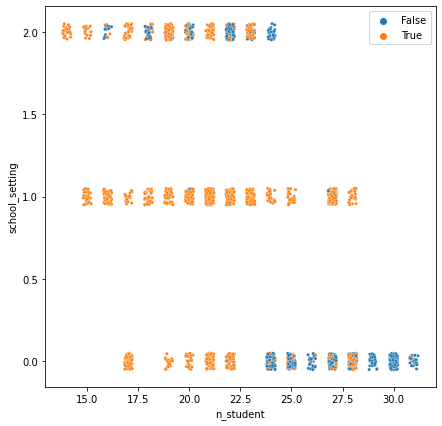

In [6]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = data,
                x = data["n_student"].apply(lambda x: x+random.random()*0.4-0.2),
                y = data["school_setting"].apply(lambda x: {"Urban":0,"Suburban":1,"Rural":2 }[x]+random.random()*0.1-0.05),
                s=10,
                hue=(data["posttest"]>60).to_list())

Estarán mal limpiados los datos? en serio hay tipos de aulas enteras donde repitieron TODOS???

In [7]:
data.loc[(data["n_student"]==30) & (data["school_setting"]=="Urban")]["posttest"].value_counts()

48.0    18
52.0    18
49.0    17
53.0    16
50.0    14
47.0    14
46.0     9
51.0     9
55.0     9
54.0     8
45.0     6
43.0     3
56.0     2
57.0     2
44.0     2
39.0     1
42.0     1
59.0     1
Name: posttest, dtype: int64

In [8]:
data.loc[(data["n_student"]==30) & (data["school_setting"]=="Urban")]["school"].value_counts()

ZOWMK    90
VVTVA    60
Name: school, dtype: int64

Y, parece que si. Eviten a las escuelas ZOWMK y VVTVA chicos

No se di esta bien dropear el nombre de la escuela (seguro que las escuelas buenas tienen mucha influencia en las notas) y el numero de clase, pero so ni va a ver demasiadas columnas de get_dummies. El pretest es una prueba de inicio de curso, y creo que no tiene sentido porque va a tener una mucho mayor corelación que cualquiera de las otras columnas

In [9]:
data=data.drop(['school', 'classroom', 'student_id','pretest'], axis=1)
data.head(3)

,school_setting,school_type,teaching_method,n_student,gender,lunch,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,76.0


In [10]:
#data.school_type.unique()

In [11]:
#data.school_type=map(lambda x: 0 if x=='Public' else 1,data.school_type)
data=pd.get_dummies(data, drop_first=True)
data.head(5)

,n_student,posttest,school_setting_Suburban,school_setting_Urban,school_type_Public,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
0,20.0,72.0,0,1,0,1,0,0
1,20.0,79.0,0,1,0,1,0,0
2,20.0,76.0,0,1,0,1,1,0
3,20.0,77.0,0,1,0,1,0,0
4,20.0,76.0,0,1,0,1,1,0


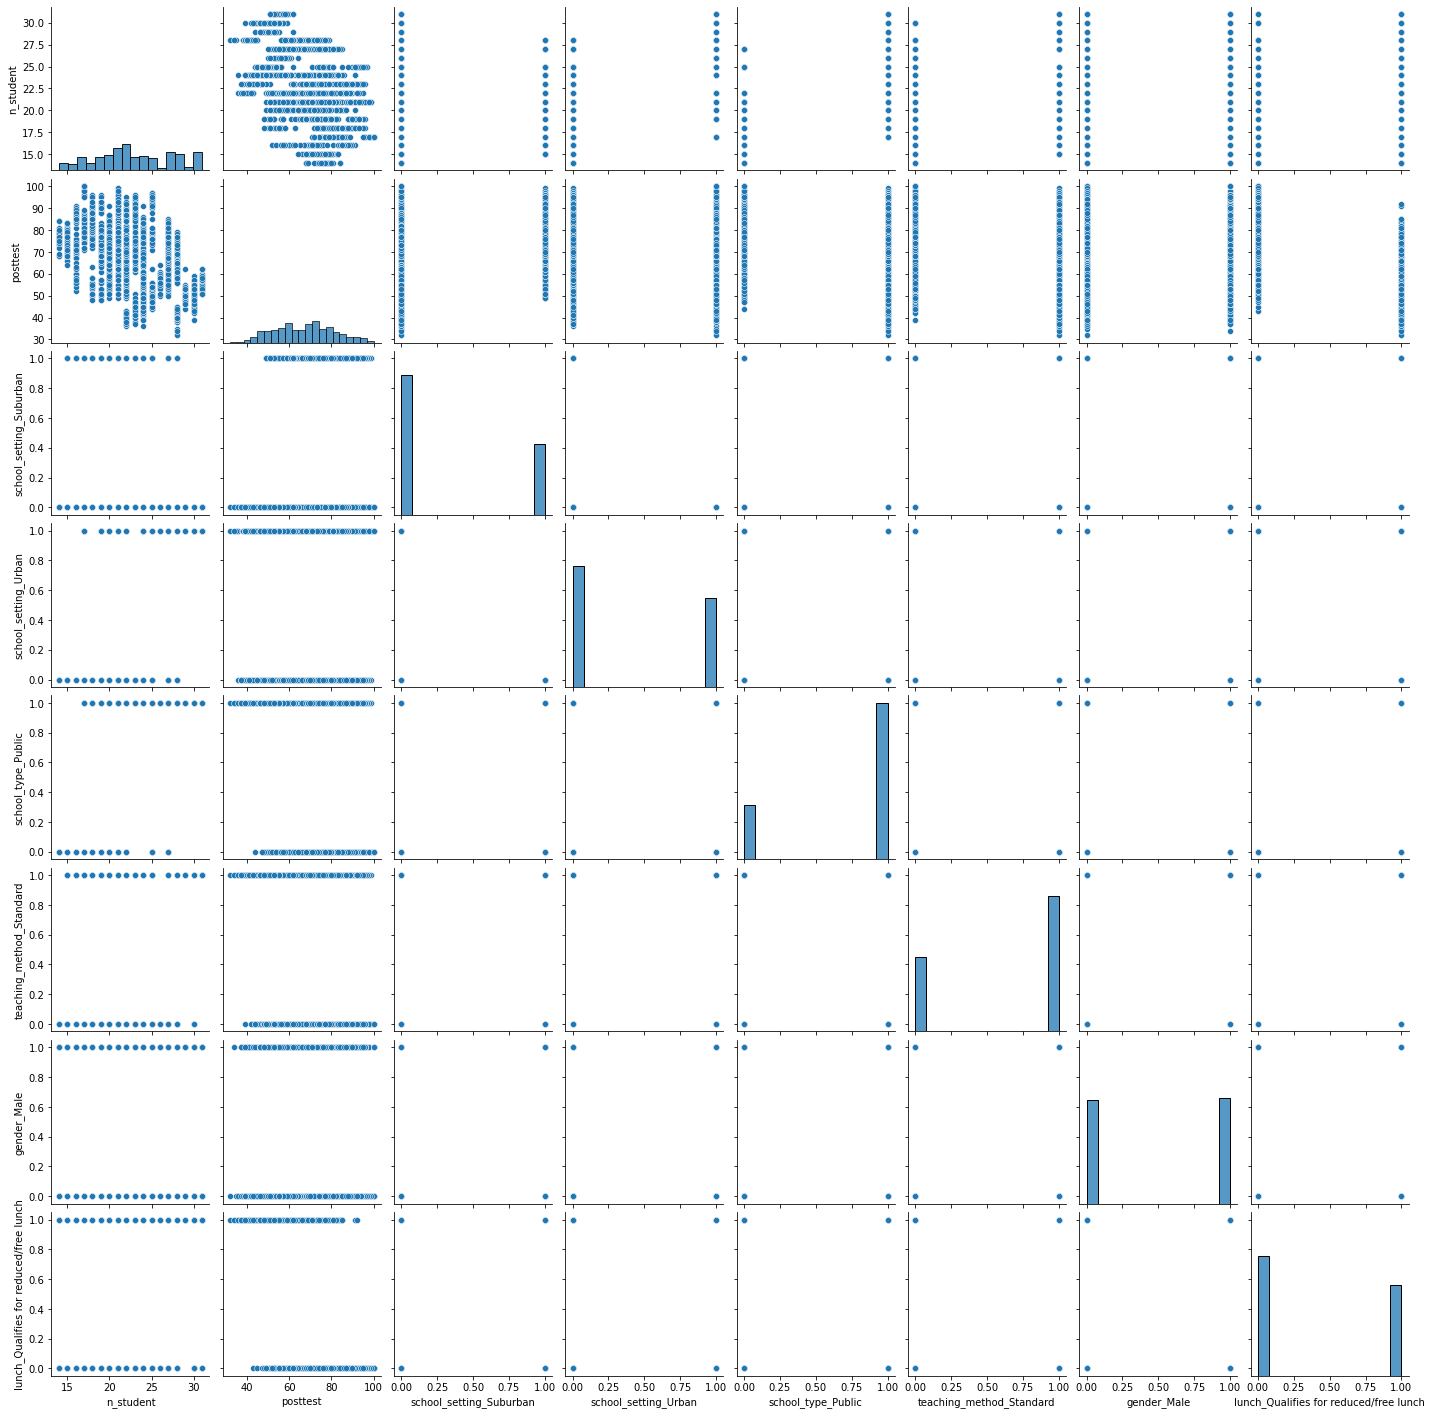

In [12]:
sns.pairplot(data)

<AxesSubplot:>

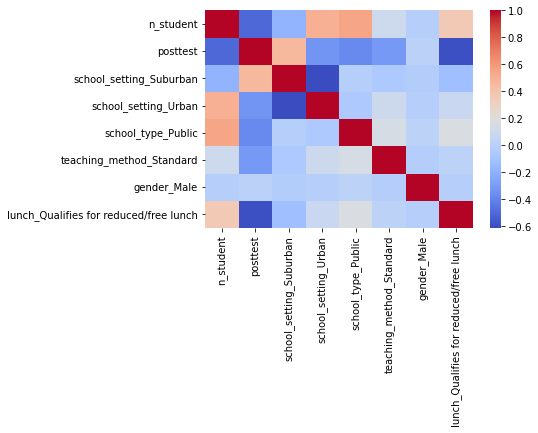

In [13]:
sns.heatmap(data.corr(), cmap="coolwarm")

In [14]:
data.posttest = data.posttest > 60

In [15]:
data.posttest.value_counts()

True     1383
False     750
Name: posttest, dtype: int64

In [16]:
X=data.drop(columns="posttest")
y=data["posttest"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=76)



In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering          
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

$e^n_s^e_r^i_o$ esto me decia que se podia usar latex pero no me funciona. como se usa?


# KNN




In [18]:
 knn = KNeighborsClassifier(n_neighbors=10) 

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
knn_predictions_y = knn.predict(X_test)

Text(33.0, 0.5, 'Aprobados reales')

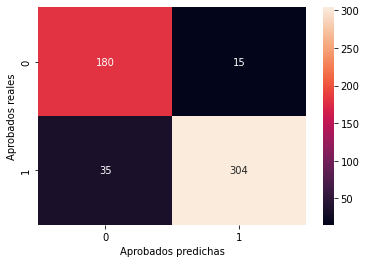

In [21]:
sns.heatmap(confusion_matrix(y_test, knn_predictions_y), annot=True, fmt='g')
plt.xlabel("Aprobados predichas")
plt.ylabel("Aprobados reales")

ahora funciona bien. habia puesto kmeans antes en vez de knn por error y me habia dado un accuracy de 0.25

In [22]:
accuracy_score(y_test, knn_predictions_y)

0.9063670411985019

ahí esta

<AxesSubplot:xlabel='n_student', ylabel='school_setting'>

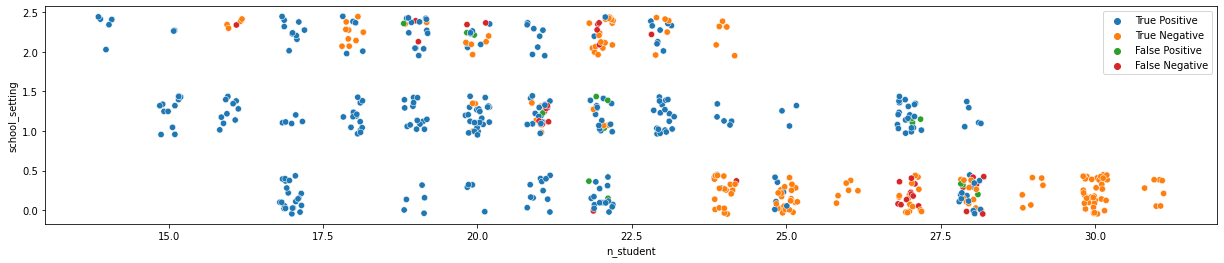

In [23]:
posmap={(True, True): "True Positive", (False, False): "True Negative", (True, False): "False Positive", (False, True): "False Negative"}
plt.figure(figsize = (21,4))
sns.scatterplot(data = X_test, 
                x = X_test["n_student"].apply(lambda x: x+random.random()*0.4-0.2), 
                y = originaldata.loc[X_test.index]["school_setting"].apply(lambda x: {"Urban":0,"Suburban":1,"Rural":2 }[x]+random.random()*0.5-0.05), 
                s=40, 
                hue=map(lambda x: posmap[tuple(x)], zip(knn_predictions_y, y_test)))

Azul: TP  
Amarillo: TN  
Verde: FP  
Rojo: FN  
El KNN funcionó bastante bien. 

# KMeans


<AxesSubplot:xlabel='n_student', ylabel='school_setting'>

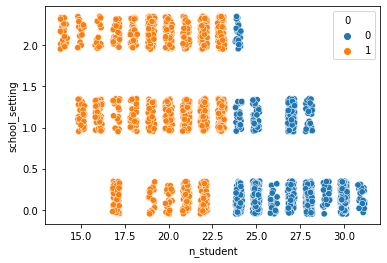

In [43]:
kmeans = KMeans(n_clusters=2, random_state=3) 
kmeans.fit(data.drop(columns="posttest"))
aprobo=pd.DataFrame(kmeans.labels_)
aprobo.value_counts()
aprobo[0]
#plt.figure(figsize = (7,7))
#sns.scatterplot(data = data_clauster, x = "ingreso", y = "gasto", hue=data_clauster["cluster"].to_list(), palette="deep", s=100)

sns.scatterplot(#data = originaldata, 
                x = originaldata["n_student"].apply(lambda x: x+random.random()*0.4-0.2), 
                y = originaldata["school_setting"].apply(lambda x: {"Urban":0,"Suburban":1,"Rural":2 }[x]+random.random()*0.4-0.05), 
                s=40, 
                hue=aprobo[0])
#data.drop(columns="posttest").head()

La variable numérica termina predominando sobre todas las otras (probando con diferentes randomstate y todo lo mismo). no resulta util.

Accuracy score:  0.7243319268635724


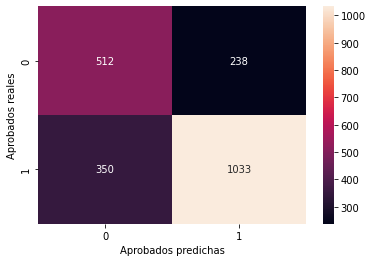

In [25]:
sns.heatmap(confusion_matrix(data['posttest'], aprobo), annot=True, fmt='g')
plt.xlabel("Aprobados predichas")
plt.ylabel("Aprobados reales")
print("Accuracy score: ",accuracy_score(data['posttest'], aprobo))

# Aglomeración Jerárquica


In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
modelo_agg = AgglomerativeClustering(n_clusters=2, linkage = "average")
modelo_agg.fit(data.drop(columns="posttest"))
modelo_agg.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
data["cluster"] = modelo_agg.labels_

In [29]:
data["cluster"].value_counts()

0    1540
1     593
Name: cluster, dtype: int64

<AxesSubplot:xlabel='n_student', ylabel='school_setting'>

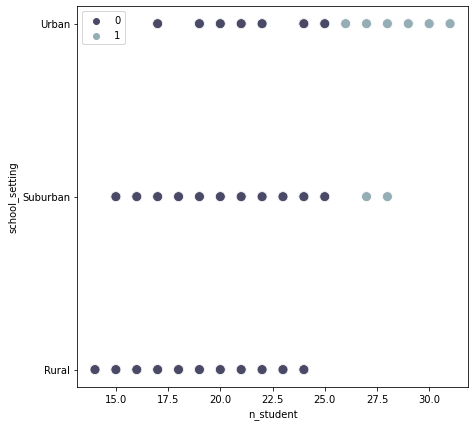

In [30]:
plt.figure(figsize = (7,7))
sns.scatterplot(
     x= originaldata["n_student"],
      y = originaldata["school_setting"],
      hue=data["cluster"].to_list(), palette="bone", s=100)

Accuracy score:  0.6976090014064698


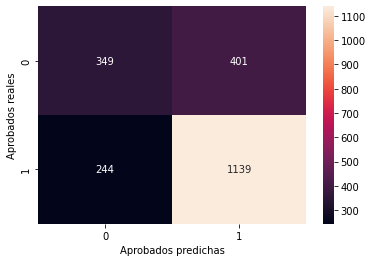

In [31]:
aprobo=pd.DataFrame(modelo_agg.labels_)
aprobo=aprobo[0].apply(lambda x: 0 if x == 1 else 1)
aprobo.value_counts()
sns.heatmap(confusion_matrix(data['posttest'], aprobo), annot=True, fmt='g')
plt.xlabel("Aprobados predichas")
plt.ylabel("Aprobados reales")
print("Accuracy score: ",accuracy_score(data['posttest'], aprobo))

# Arbol de *Desiciones*

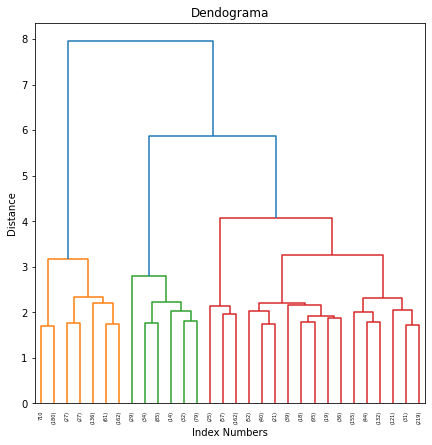

In [32]:
##
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

Z = linkage(data, 'average');

plt.figure(figsize=[7,7])
plt.title('Dendograma')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold="default",
    truncate_mode='lastp'
)
plt.show()

# random forest


0.9213483146067416


<AxesSubplot:>

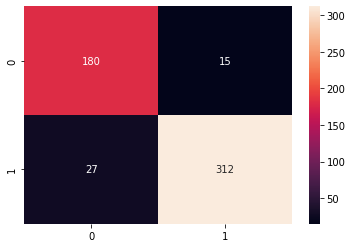

In [40]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
print(accuracy_score(y_test, predict_random_forest))
sns.heatmap(confusion_matrix(y_test, predict_random_forest), annot=True, fmt='g')

funciona bien pero me olvideo que hacia el random forest espera que leo el pdf  
  
mira vos que interesante

<AxesSubplot:xlabel='n_student', ylabel='school_setting'>

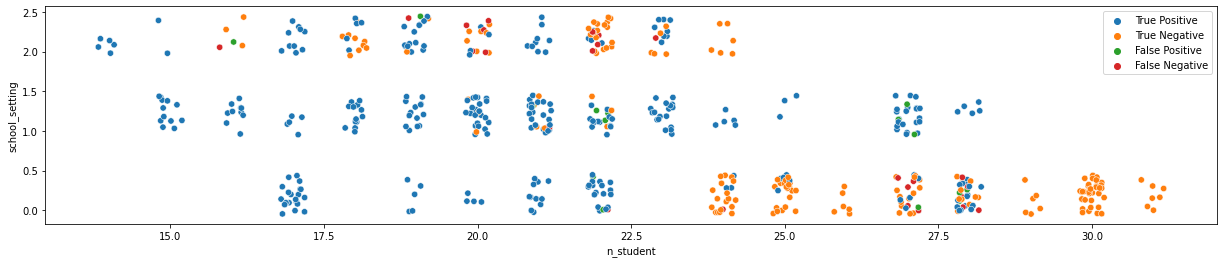

In [41]:
""" estaba intentando hacer que los cositos queden en una grilla en vez de el random pero no me salio. despues intento de nuevo
class test:
    def __init__(self):
        self.data=dict()
    def getloc(setting, numb):
        if (setting, numb) in self.data.keys():
            self.data[(setting, numb)]+=1
        else:
            self.data[(setting, numb)]=1
        return setting-0.05
""" 
    
posmap={(True, True): "True Positive", (False, False): "True Negative", (True, False): "False Positive", (False, True): "False Negative"}
plt.figure(figsize = (21,4))
sns.scatterplot(data = X_test, 
                x = X_test["n_student"].apply(lambda x: x+random.random()*0.4-0.2), 
                y = originaldata.loc[X_test.index]["school_setting"].apply(lambda x: {"Urban":0,"Suburban":1,"Rural":2 }[x]+random.random()*0.5-0.05), 
                s=40, 
                hue=map(lambda x: posmap[tuple(x)], zip(predict_random_forest, y_test)))